# Masks : land-sea and relief

The aim of this notebook is to indicate how to read the data from masks. Per geographic zone ('NW' for North-West of France and 'SE' for South-East of France), You have 2 different masks stored in a GRIB file:
<ul>
    <li>the land-sea mask (called 'lsm' in the file). The values are between 0 (sea) and 1 (land).</li>
    <li>the relief mask (called 'p3008' in the file). The values are in meters.</li>
</ul>

The spatial resolution is 0.025°. 

Remark 1: to open easily a GRIB file with Python, it is necessary to install the packages (in this order) *eccodes*, *cfgrib* then *xarray* with the following commands (if you use the Anaconda environment):
<ul>
    <li>1:conda install -c conda-forge eccodes</li>
    <li>2:conda install -c conda-forge cfgrib</li>
    <li>3:conda install -c anaconda xarray</li>    
</ul>
When you open a GRIB file with the library xarray, a new associated file of type .idx is created. 

Remark 2: the *Basemap* library is required to plot the background map. Here is the command to type into in a terminal to install the package if you use the Anaconda environment : *conda install -c anaconda basemap*</li>

In [1]:
#####TO DO ONLY IF YOU ARE A PROBLEM WITH THE LIBRARY BASEMAP OR XARRAY###
import os
#####TO DO ONLY IF YOU ARE A PROBLEM TO IMPORT THE BASEMAP LIBRARY -> PROBLEM OF TYPE "KeyError : 'PROJ_LIB'" (cf next cell)#####
#indicate the path to the file 'epsg'
#(located normally into the directory /Library/share of Anaconda) via the next commands : 
os.environ["PROJ_LIB"]="C:/Users/larvorg/AppData/Local/Continuum/anaconda3/Library/share"   #-> type example of path

#####TO DO ONLY IF YOU ARE A PROBLEM TO IMPORT THE ECCODES LIBRARY -> PROBLEM OF TYPE "ECCODES ERROR   :  Unable to find boot.def,
#The environment variable ECCODES_DEFINITION_PATH is defined but incorrect"
#Solution : indicate the path to the file 'boot.def'
#(located normally into the directory Library/share/eccodes/definitions of Anaconda)
os.environ["ECCODES_DEFINITION_PATH"]="C:/Users/larvorg/AppData/Local/Continuum/anaconda3/Library/share/eccodes/definitions"   #-> type example of path

In [2]:
import xarray as xr
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm 
from coordinates_and_projection import *

In [3]:
####Cell containing the modifiable fields######
path = 'D:/prez_opendata/data/output/samples/masks/'   #path to the data
zone = 'NW'      #study zone 

In [4]:
file = zone+'_'+'masks.grib'      #file name 

#coordinates of study zone boundaries
lllat=DOMAINS[zone]['lry']    #lower left latitude
urlat=DOMAINS[zone]['uly']    #upper right latitude
lllon=DOMAINS[zone]['ulx']    #lower left longitude
urlon=DOMAINS[zone]['lrx']    #upper right longitude

data = xr.open_dataset(path+file, engine='cfgrib')   #data loading

Overview of the data -> print(data) to get the metadata : 

In [5]:
print(data)

<xarray.Dataset>
Dimensions:    (latitude: 227, longitude: 315)
Coordinates:
    step       timedelta64[ns] ...
    surface    int32 ...
  * latitude   (latitude) float64 51.9 51.87 51.85 51.82 ... 46.3 46.27 46.25
  * longitude  (longitude) float64 -5.842 -5.817 -5.792 ... 1.958 1.983 2.008
Data variables:
    lsm        (latitude, longitude) float32 ...
    p3008      (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             lfpw
    GRIB_centreDescription:  French Weather Service - Toulouse
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             French Weather Service - Toulouse
    history:                 2019-10-04T16:26:04 GRIB to CDM+CF via cfgrib-0....


Get the information about coordinates (latitude and longitude):

In [6]:
coord = 'longitude'
data[coord]
vals = data[coord].values  #get the values
print(data[coord])

<xarray.DataArray 'longitude' (longitude: 315)>
array([-5.842, -5.817, -5.792, ...,  1.958,  1.983,  2.008])
Coordinates:
    step       timedelta64[ns] ...
    surface    int32 ...
  * longitude  (longitude) float64 -5.842 -5.817 -5.792 ... 1.958 1.983 2.008
Attributes:
    units:          degrees_east
    standard_name:  longitude
    long_name:      longitude


In [7]:
print(data[coord].units)  #example to get the information from attributes

degrees_east


In [8]:
vals

array([-5.842, -5.817, -5.792, -5.767, -5.742, -5.717, -5.692, -5.667,
       -5.642, -5.617, -5.592, -5.567, -5.542, -5.517, -5.492, -5.467,
       -5.442, -5.417, -5.392, -5.367, -5.342, -5.317, -5.292, -5.267,
       -5.242, -5.217, -5.192, -5.167, -5.142, -5.117, -5.092, -5.067,
       -5.042, -5.017, -4.992, -4.967, -4.942, -4.917, -4.892, -4.867,
       -4.842, -4.817, -4.792, -4.767, -4.742, -4.717, -4.692, -4.667,
       -4.642, -4.617, -4.592, -4.567, -4.542, -4.517, -4.492, -4.467,
       -4.442, -4.417, -4.392, -4.367, -4.342, -4.317, -4.292, -4.267,
       -4.242, -4.217, -4.192, -4.167, -4.142, -4.117, -4.092, -4.067,
       -4.042, -4.017, -3.992, -3.967, -3.942, -3.917, -3.892, -3.867,
       -3.842, -3.817, -3.792, -3.767, -3.742, -3.717, -3.692, -3.667,
       -3.642, -3.617, -3.592, -3.567, -3.542, -3.517, -3.492, -3.467,
       -3.442, -3.417, -3.392, -3.367, -3.342, -3.317, -3.292, -3.267,
       -3.242, -3.217, -3.192, -3.167, -3.142, -3.117, -3.092, -3.067,
      

Example for the land-sea mask:

In [9]:
lsm=data['lsm']
lsm_vals=data['lsm'].values     #get the values
#lsm.units                      #example to the information from attributes
lsm

<xarray.DataArray 'lsm' (latitude: 227, longitude: 315)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]], dtype=float32)
Coordinates:
    step       timedelta64[ns] ...
    surface    int32 ...
  * latitude   (latitude) float64 51.9 51.87 51.85 51.82 ... 46.3 46.27 46.25
  * longitude  (longitude) float64 -5.842 -5.817 -5.792 ... 1.958 1.983 2.008
Attributes:
    GRIB_paramId:                             172
    GRIB_shortName:                           lsm
    GRIB_units:                               (0 - 1)
    GRIB_name:                                Land-sea mask
    GRIB_cfName:                              land_binary_mask
    GRIB_cfVarName:                           lsm
    GRIB_missingValue:                        9999
    GRIB_numberOfPoints:                      71505
    GRIB_typeOfL

<IPython.core.display.Javascript object>


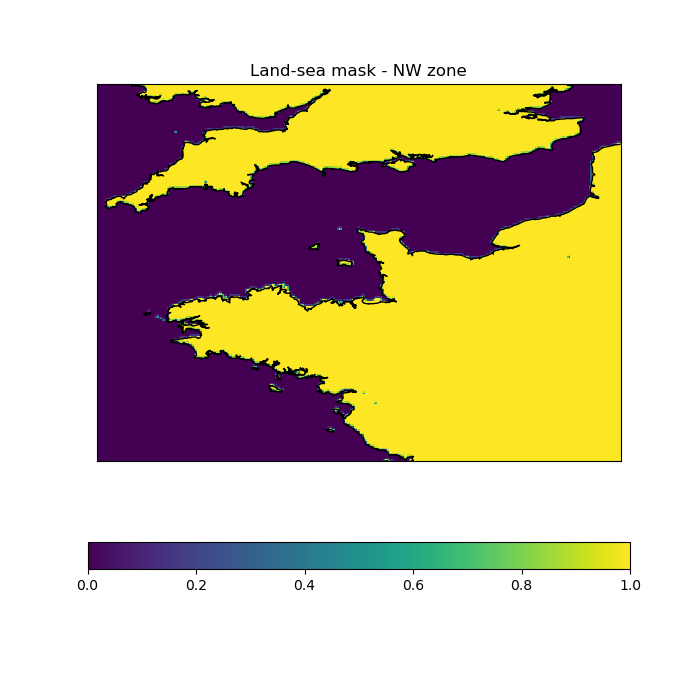

C:\Users\larvorg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
C:\Users\larvorg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


In [11]:
fig,ax=plt.subplots(1,1,figsize=(7,7))

#background map definition : coordinates of corners, resolution, projection type
m = Basemap(epsg=n_epsg,resolution='h',llcrnrlat=lllat,
                  urcrnrlat=urlat,
                  llcrnrlon=lllon,
                  urcrnrlon=urlon)

#plot the data and the background map (coastlines and borders)
m.drawcoastlines()
m.drawcountries()
img=m.imshow(lsm_vals, interpolation='none', origin='upper')
plt.colorbar(img, orientation= 'horizontal').set_label('')
plt.title("Land-sea mask - "+ zone + " zone")
plt.show()

Example for the relief mask:

In [12]:
r=data['p3008']
r_vals=data['p3008'].values     #get the values
#r.units                      #example to the information from attributes
r

<xarray.DataArray 'p3008' (latitude: 227, longitude: 315)>
array([[-1.678467e-04, -1.678467e-04, -1.678467e-04, ..., -1.678467e-04,
        -1.678467e-04, -1.678467e-04],
       [-1.678467e-04, -1.678467e-04, -1.678467e-04, ..., -1.678467e-04,
        -1.678467e-04, -1.678467e-04],
       [-1.678467e-04, -1.678467e-04, -1.678467e-04, ..., -1.678467e-04,
        -1.678467e-04, -1.678467e-04],
       ...,
       [-1.678467e-04, -1.678467e-04, -1.678467e-04, ...,  4.325273e+02,
         4.258907e+02,  4.249302e+02],
       [-1.678467e-04, -1.678467e-04, -1.678467e-04, ...,  4.645895e+02,
         4.896714e+02,  4.821830e+02],
       [-1.678467e-04, -1.678467e-04, -1.678467e-04, ...,  4.587374e+02,
         4.796418e+02,  4.744642e+02]], dtype=float32)
Coordinates:
    step       timedelta64[ns] ...
    surface    int32 ...
  * latitude   (latitude) float64 51.9 51.87 51.85 51.82 ... 46.3 46.27 46.25
  * longitude  (longitude) float64 -5.842 -5.817 -5.792 ... 1.958 1.983 2.008
Attributes:


<IPython.core.display.Javascript object>


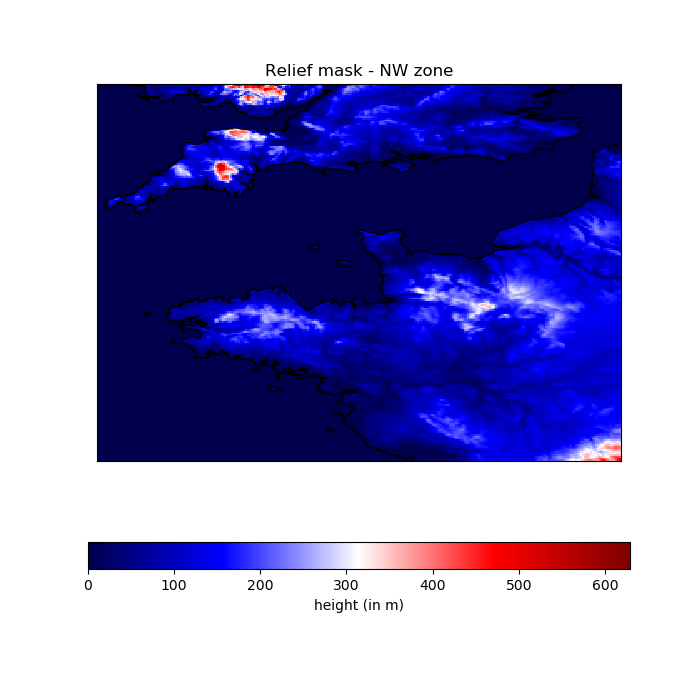

C:\Users\larvorg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
C:\Users\larvorg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


In [13]:
fig,ax=plt.subplots(1,1,figsize=(7,7))

#background map definition : coordinates of corners, resolution, projection type
m = Basemap(epsg=n_epsg,resolution='h',llcrnrlat=lllat,
                  urcrnrlat=urlat,
                  llcrnrlon=lllon,
                  urcrnrlon=urlon)

#plot the data and the background map (coastlines and borders)
m.drawcoastlines()
m.drawcountries()
img=m.imshow(r_vals, interpolation='none', origin='upper',cmap='seismic')
plt.colorbar(img, orientation= 'horizontal').set_label('height (in m)')
plt.title("Relief mask - "+ zone + " zone")
plt.show()